In [ ]:
# Implementation of Decision Tree for Cricket Score Prediction

# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'batting_summary.csv'
batting_df = pd.read_csv(file_path)
print(batting_df.describe())
batting_df.head(), batting_df.info()

         Match_no  Batting_Position        Runs       Balls          4s  \
count  916.000000        916.000000  916.000000  916.000000  916.000000   
mean    24.669214          5.398472   26.510917   29.021834    2.533843   
std     14.042355          3.035952   30.788666   28.493381    3.119120   
min      1.000000          1.000000    0.000000    0.000000    0.000000   
25%     12.000000          3.000000    5.000000    8.000000    0.000000   
50%     25.000000          5.000000   15.000000   19.000000    1.000000   
75%     37.000000          8.000000   38.000000   40.250000    4.000000   
max     48.000000         11.000000  201.000000  143.000000   21.000000   

               6s  
count  916.000000  
mean     0.727074  
std      1.482049  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max     11.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column            Non-Null Count  

(   Match_no           Match_Between Team_Innings    Batsman_Name  \
 0         1  England vs New Zealand      England  Jonny Bairstow   
 1         1  England vs New Zealand      England     Dawid Malan   
 2         1  England vs New Zealand      England        Joe Root   
 3         1  England vs New Zealand      England     Harry Brook   
 4         1  England vs New Zealand      England       Moeen Ali   
 
    Batting_Position                            Dismissal  Runs  Balls  4s  6s  \
 0                 1  c Daryl Mitchell b Mitchell Santner    33     35   4   1   
 1                 2            c Tom Latham b Matt Henry    14     24   2   0   
 2                 3                     b Glenn Phillips    77     86   4   1   
 3                 4     c Devon Conway b Rachin Ravindra    25     16   4   1   
 4                 5                     b Glenn Phillips    11     17   1   0   
 
   Strike_Rate  
 0      94.300  
 1      58.300  
 2      89.500  
 3     156.300  
 4   

In [ ]:
print(batting_df.isnull().sum())
batting_df.shape

Match_no            0
Match_Between       0
Team_Innings        0
Batsman_Name        0
Batting_Position    0
Dismissal           2
Runs                0
Balls               0
4s                  0
6s                  0
Strike_Rate         0
dtype: int64


(916, 11)

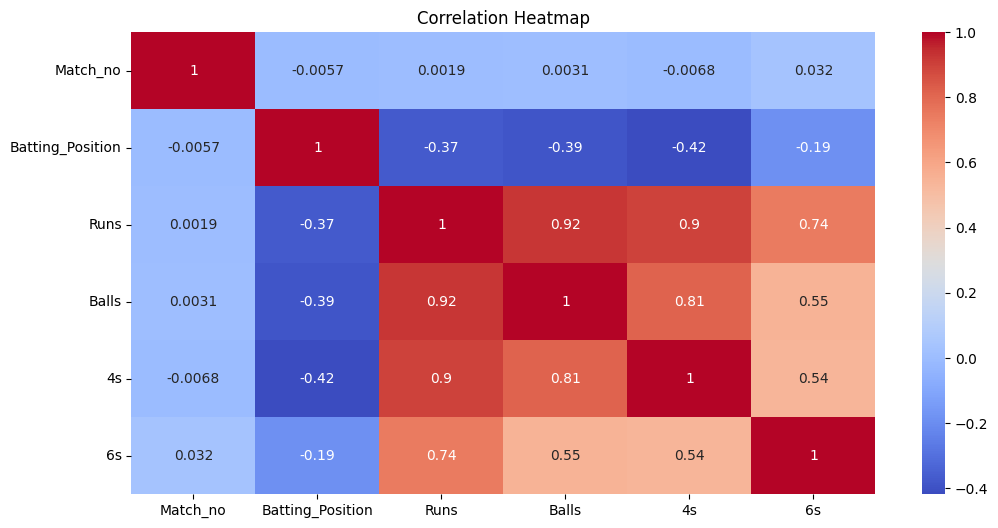

In [ ]:
numerical_df = batting_df.select_dtypes(include=[np.number])
categorical_df = batting_df.select_dtypes(exclude=[np.number])
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

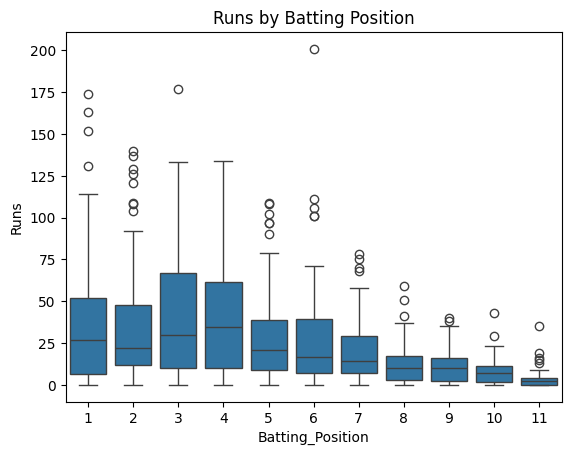

In [ ]:
#Batting Position Impact:
sns.boxplot(x='Batting_Position', y='Runs', data=batting_df)
plt.title('Runs by Batting Position')
plt.show()

In [ ]:
#Preprocess the Data
# Handle missing values
batting_df.fillna(0, inplace=True)

batting_df['Strike_Rate'] = pd.to_numeric(batting_df['Strike_Rate'], errors='coerce')


batting_df['Boundary_Count'] = batting_df['4s'] + batting_df['6s']


# Aggregate team-level statistics
team_stats = batting_df.groupby(['Match_no', 'Team_Innings']).agg({
    'Runs': 'sum',
    'Balls': 'sum',
    'Boundary_Count': 'sum',
    'Strike_Rate': 'mean'
}).reset_index()


team_stats['Overs'] = team_stats['Balls'] // 6 + (team_stats['Balls'] % 6) / 10


team_stats['Run_Rate'] = team_stats['Runs'] / team_stats['Overs']

In [ ]:
# Features and Target
X = team_stats[['Boundary_Count', 'Overs', 'Run_Rate']]
y = team_stats['Runs']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train the Decision Tree Model

dt = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# 8. Evaluate the Model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)


print(f"Decision Tree Regressor - MAE: {mae_dt}")
print(f"Decision Tree Regressor - MSE: {mse_dt}")
print(f"Decision Tree Regressor - R² Score: {r2_dt}")

Decision Tree Regressor - MAE: 12.95
Decision Tree Regressor - MSE: 307.55
Decision Tree Regressor - R² Score: 0.9412485004088058


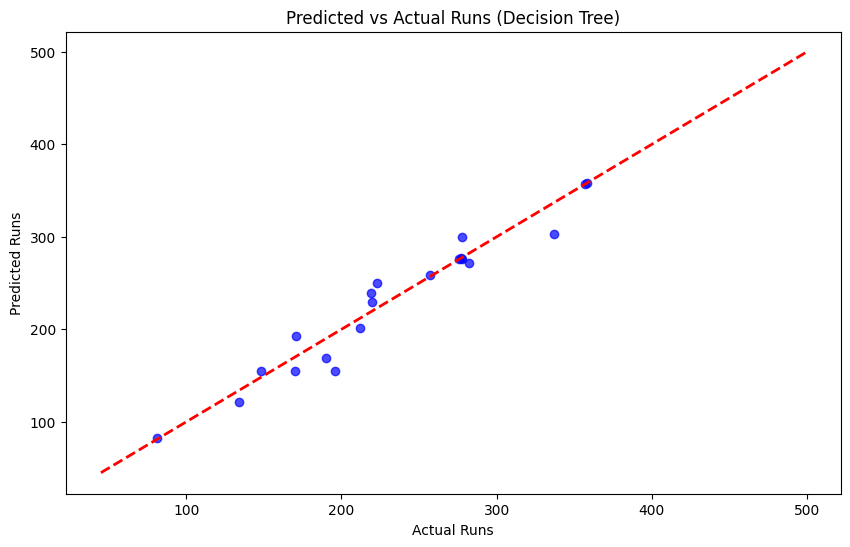

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.title('Predicted vs Actual Runs (Decision Tree)')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.show()


In [ ]:
print("Welcome to the Cricket Score Prediction CLI!")
print("Please enter the following details:")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# user input
while True:
    try:
        boundary_count = float(input("Enter Boundary Count (Sum of 4s and 6s): "))
        overs = float(input("Enter Overs Played (e.g., 20): "))
        run_rate = float(input("Enter Current Run Rate (e.g., 8.5): "))


        user_input = [[boundary_count, overs, run_rate]]


        predicted_runs = dt.predict(user_input)
        print(f"\nPredicted Total Runs: {predicted_runs[0]:.2f}")

        choice = input("Type 'exit' to quit or press Enter to predict again: ")
        if choice.lower() == 'exit':
            break

    except ValueError:
        print("Invalid input. Please ensure all inputs are numeric.")

    except Exception as e:
        print(f"An error occurred: {e}")


Welcome to the Cricket Score Prediction CLI!
Please enter the following details:
Enter Boundary Count (Sum of 4s and 6s): 6
Enter Overs Played (e.g., 20): 5
Enter Current Run Rate (e.g., 8.5): 10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names




Predicted Total Runs: 157.00
Type 'exit' to quit or press Enter to predict again: exit


In [ ]:

print("\nEvaluating the Model on Test Data...")
y_pred_test = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Evaluating the Model on Test Data...

Evaluation Metrics:
Mean Absolute Error (MAE): 12.95
Mean Squared Error (MSE): 307.55
R² Score: 0.94


In [ ]:
# 10. Optimize the Decision Tree
# Test different tree depths to find the optimal value
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Extract the best model
best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 11. Retrain and Evaluate with Optimal Parameters
# Predict with the optimized model
y_pred_best = best_dt.predict(X_test)

# Evaluate the optimized model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Decision Tree - MAE: {mae_best}")
print(f"Optimized Decision Tree - MSE: {mse_best}")
print(f"Optimized Decision Tree - R² Score: {r2_best}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Decision Tree - MAE: 12.95
Optimized Decision Tree - MSE: 307.55
Optimized Decision Tree - R² Score: 0.9412485004088058


In [ ]:
print(f"Model Accuracy (R² Score): {r2 * 100:.2f}%")

Model Accuracy (R² Score): 94.12%


Evaluation Metrics:
Mean Absolute Error (MAE): 9.89
Mean Squared Error (MSE): 155.87
R² Score: 0.97


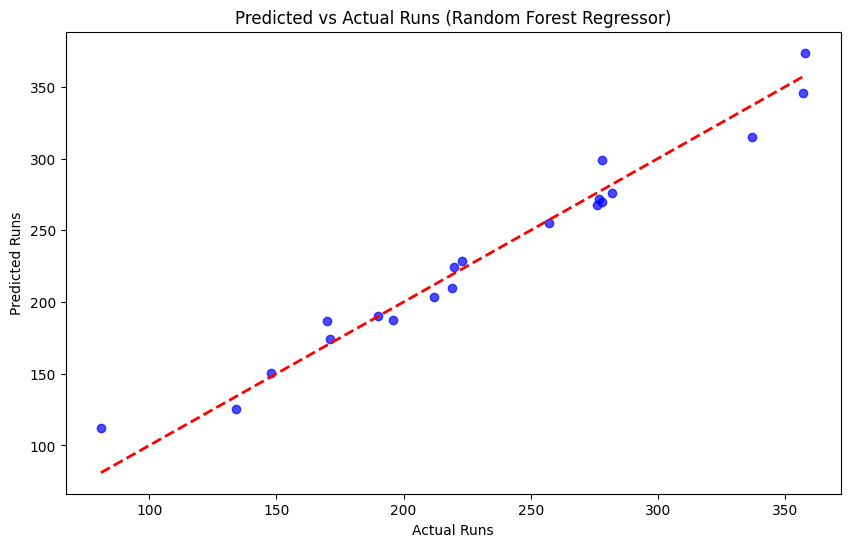

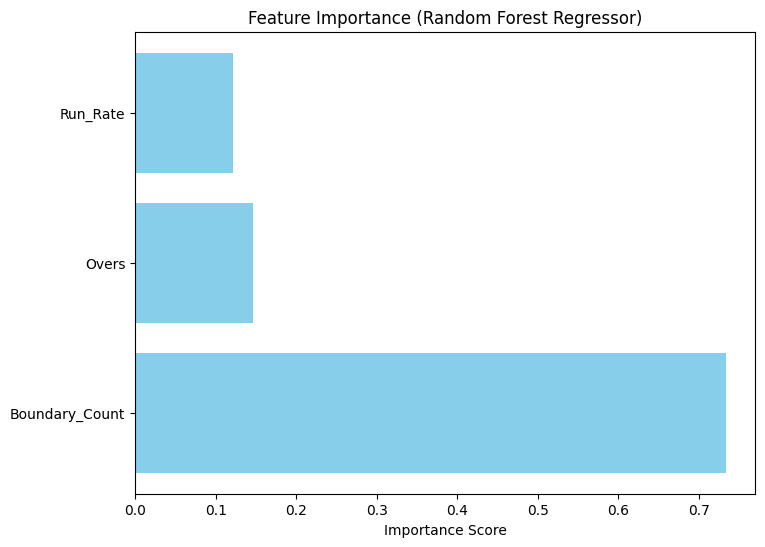

In [ ]:
#Implementation of Random Forest for Cricket Score Regression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Predicted vs Actual Runs (Random Forest Regressor)')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.show()
feature_importance = rf.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance (Random Forest Regressor)')
plt.show()

In [ ]:
print(f"Model Accuracy (R² Score): {r2 * 100:.2f}%")


Model Accuracy (R² Score): 97.02%


MAE: 13.253007121828393
MSE: 385.8790178183102
R² Score: 0.9262852513165245


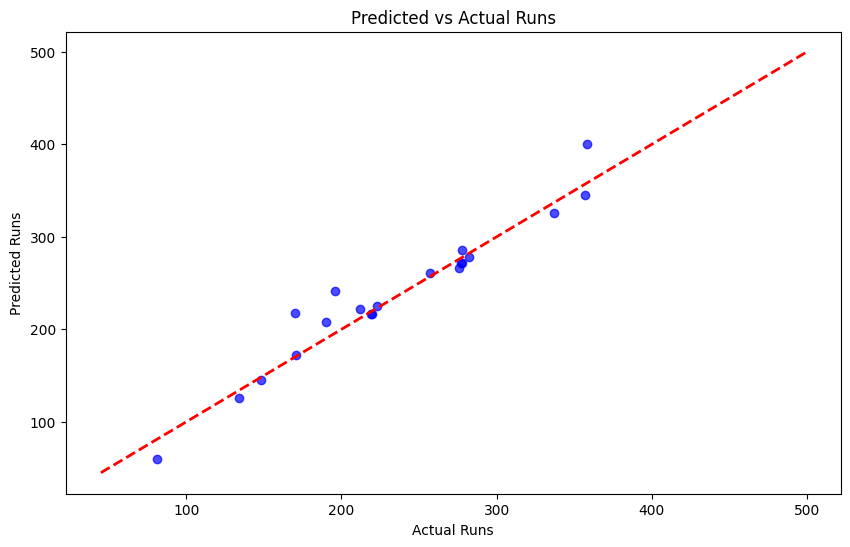

In [ ]:
#Implementation of linear regression for Cricket Score Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.title('Predicted vs Actual Runs')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.show()



In [ ]:
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Runs', 'y': 'Predicted Runs'},
                 title='Actual vs Predicted Runs')
fig.add_shape(type="line", x0=y_test.min(), x1=y_test.max(),
              y0=y_test.min(), y1=y_test.max(), line=dict(color="red", dash="dash"))
fig.show()

In [ ]:
print(f"Model Accuracy (R² Score): {r2 * 100:.2f}%")

Model Accuracy (R² Score): 92.63%


In [ ]:
#Implementation of KNN for Cricket Score Prediction
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
while True:
    try:

        overs = float(input("Enter overs: "))
        run_rate = float(input("Enter run rate: "))
        boundary_count = float(input("Enter boundary count: "))

        # Scale the user input the same way the training data was scaled
        user_input = scaler.transform([[boundary_count, overs, run_rate]])


        predicted_score = knn.predict(user_input)


        print(f"Predicted Score: {predicted_score[0]:.2f}")


        choice = input("Type 'exit' to quit or press Enter to predict again: ")
        if choice.lower() == 'exit':
            break
    except Exception as e:
        print(f"Error: {e}")

Enter overs: 12
Enter run rate: 10
Enter boundary count: 6


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



Predicted Score: 112.20
Type 'exit' to quit or press Enter to predict again: exit


In [ ]:
y_pred_knn = knn.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print(f"KNN Regressor - MAE: {mae_knn}")
print(f"KNN Regressor - MSE: {mse_knn}")
print(f"KNN Regressor - R² Score: {r2_knn}")

KNN Regressor - MAE: 19.610000000000003
KNN Regressor - MSE: 501.89000000000016
KNN Regressor - R² Score: 0.904123589238093


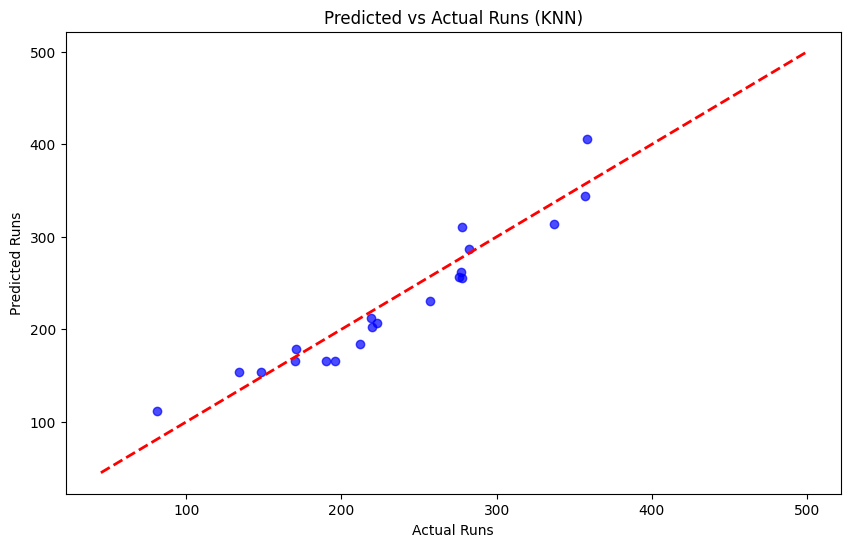

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.title('Predicted vs Actual Runs (KNN)')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.show()

Optimal k: 4


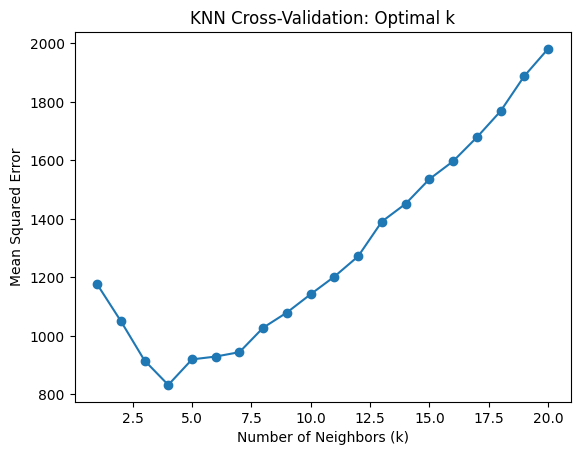

In [ ]:
from sklearn.model_selection import cross_val_score #optimize

# Try different values for k
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

# Find the optimal k
optimal_k = k_values[np.argmin(cv_scores)]
print(f"Optimal k: {optimal_k}")


plt.plot(k_values, cv_scores, marker='o')
plt.title('KNN Cross-Validation: Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

mae_optimal = mean_absolute_error(y_test, y_pred_optimal)
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)

print(f"Optimal KNN Regressor - MAE: {mae_optimal}")
print(f"Optimal KNN Regressor - MSE: {mse_optimal}")
print(f"Optimal KNN Regressor - R² Score: {r2_optimal}")

Optimal KNN Regressor - MAE: 18.6125
Optimal KNN Regressor - MSE: 537.946875
Optimal KNN Regressor - R² Score: 0.8972356182518396


In [ ]:
print(f"Model Accuracy (R² Score): {r2_optimal * 100:.2f}%")

Model Accuracy (R² Score): 89.72%


In [ ]:
# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'R^2': r2}

    print(f"{name}:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R^2 Score: {r2:.2f}\n")

Linear Regression:
  Mean Absolute Error (MAE): 13.25
  Mean Squared Error (MSE): 385.88
  R^2 Score: 0.93

Decision Tree:
  Mean Absolute Error (MAE): 12.95
  Mean Squared Error (MSE): 307.55
  R^2 Score: 0.94

KNN Regressor:
  Mean Absolute Error (MAE): 19.61
  Mean Squared Error (MSE): 501.89
  R^2 Score: 0.90

Random Forest:
  Mean Absolute Error (MAE): 9.89
  Mean Squared Error (MSE): 155.87
  R^2 Score: 0.97



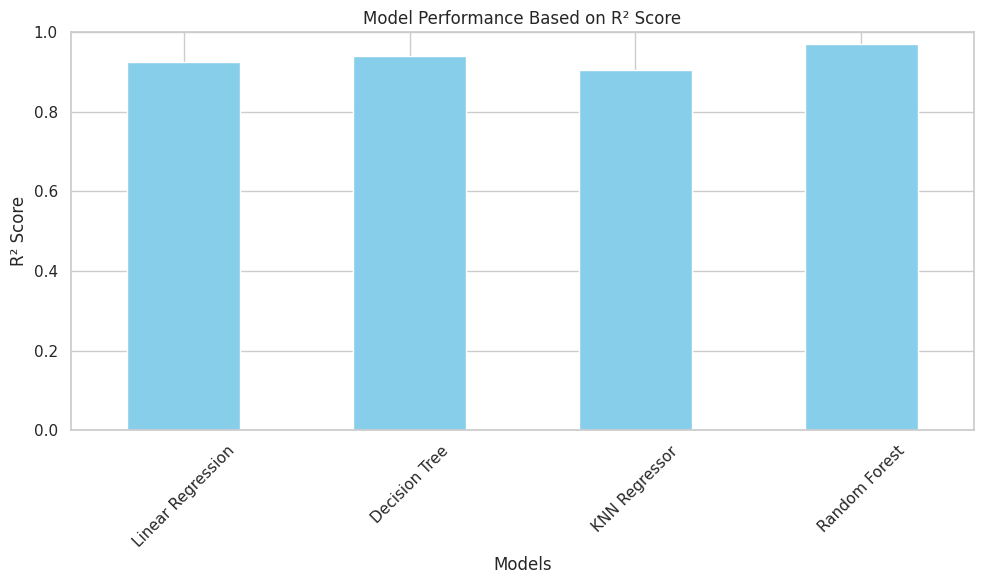

In [ ]:
results_df = pd.DataFrame(results).T
r2_scores = results_df['R^2']

# Plotting the R^2 scores
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')
r2_scores.plot(kind='bar', color='skyblue')
plt.title('Model Performance Based on R² Score')
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming R² scores are in the range [0, 1]
plt.tight_layout()

# Display the plot
plt.show()